__*Brandon Inscoe PHY 2200 Unit_01 Project: Lissajous Curves*__



Lissajous curves describe complex harmonic motion. Lissajous curves are graphed by the system of parametric equations $$x=Asin(at+\delta), y=Bsin(bt)$$

The appearance of the curve is highly sensitive to the ratio $a/b$. For a ratio of 1, the curve is an ellipse, with special cases including circles ($A=A$, $\delta=\frac{pi}{2}$ radians) and lines ($\delta=0$). Another simple Lissajous curve is a parabola ($\frac{b}{a}=2$, $\delta=\frac{pi}{4}$).

Vissually, the ratio $\frac{a}{b}$ determines the number of "lobes" of the curve. For example, a ratio of $\frac{4}{5}$ produces a curve with 5 horizontal lobes and 4 vertical lobes. The ratio of $\frac{A}{B}$ determines the relative width-to-height ratio of the curve. For example, a ratio of $\frac{2}{1}$ produces a curve that is twice as wide as it is high. Finally, the value of $\delta$ determines the apparant "rotation" angle of the curve, as viewed if it were actually a three-dimensional curve. Any non-zero $\delta$ produces a curve that appears to be rotated, either left-right or an up-down rotation (depending on the ratio of $\frac{a}{b}$).

In this project, I will write code to produce Lissajous curves.

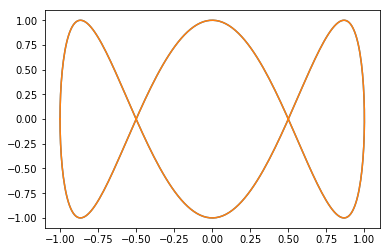

In [72]:
import numpy as np   #import the numpy package
import matplotlib.pyplot as plt  #import the matplotlib and pyplot package


a = 1 # plotting the curves for different values of a/b
b = 3 
delta = np.pi/2   #
t = np.linspace(-np.pi,np.pi,300) #linspace(start,end,num) to generate a grid. It returns an array of evenly spaced points between [start,end]     

for i in range(0,2):
 x = np.sin(a * t + delta)
 y = np.sin(b * t)
 plt.plot(x,y)

plt.show()



If we change $delta=\frac{pi}{2}$ to $delta=\frac{pi}{4}$, the curve becomes more elliptical...

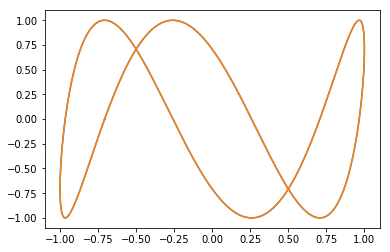

In [73]:
a = 1 # plotting the curves for different values of a/b
b = 3 
delta = np.pi/4   #as the denominator grows bigger, the curve becomes more elliptical
t = np.linspace(-np.pi,np.pi,300)

for i in range(0,2):
 x = np.sin(a * t + delta)
 y = np.sin(b * t)
 plt.plot(x,y)

plt.show()


If we change the values of a and b, we can produce even more different curves...

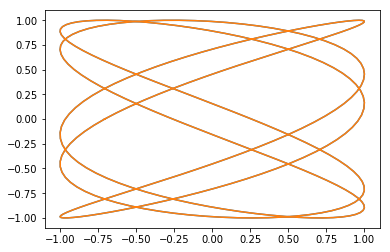

In [77]:
a = 5 
b = 3 
delta = np.pi/4   #as the denominator grows bigger, the curve becomes more elliptical
t = np.linspace(-np.pi,np.pi,300)

for i in range(0,2):
 x = np.sin(a * t + delta)
 y = np.sin(b * t)
 plt.plot(x,y)

plt.show()


In the next chunk of code, feel free to play around and change values. See what you get.

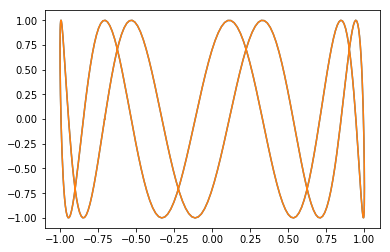

In [78]:
a = 1 
b = 7 
delta = np.pi/4   #as the denominator grows bigger, the curve becomes more elliptical
t = np.linspace(-np.pi,np.pi,300)

for i in range(0,2):
 x = np.sin(a * t + delta)
 y = np.sin(b * t)
 plt.plot(x,y)

plt.show()


Now that we have solved the curves using parametric equations, let's use differential equations to solve for the Lissajous curves.
Lissajous Figures arise from the motion of a two-dimensional harmonic oscillator described by:

$$\vec{F}_{net}=\langle -k_1x, -k_2y, 0 \rangle$$

where $x$ and $y$ are coordinates in the x-y plane and $k$ is a characteristic "stiffness" of the motion in N/m. The stiffnesses $k$ can be written more generally as:

$$k=m\omega^2$$

so the force can be written:

$$\vec{F}_{net}=\langle -m\omega_1^2x, -m\omega_2^2y, 0 \rangle$$

Since $\omega_1$ = a and $\omega_2$ = b, the above becomes

$$\vec{F}_{net}=\langle -ma^2x, -mb^2y, 0 \rangle$$

Since $\vec{F}_{net}$ is a vector including x and y components, it can be broken down to 

$$\vec{F}_{xnet} \enspace \text{and} \enspace \vec{F}_{ynet}$$

where

$$\vec{F}_{xnet}=-ma^2x \enspace \text{and} \enspace \vec{F}_{ynet}=-mb^2x$$

Now we take the derivative of $v_{x}$ and $v_{y}$.

$$\frac{dv_x}{dt} = \frac{\vec{F}_{ynet}}{m} \enspace , \enspace \frac{dv_y}{dt} = \frac{\vec{F}_{ynet}}{m}$$

and the m's cancel, so we have

$$\frac{dv_x}{dt} = -a^2x \enspace , \enspace \frac{dv_y}{dt} = -b^2y$$
and
$$\frac{dv_x}{dt} = v_x \enspace , \enspace \frac{dv_y}{dt} = v_y$$

We will use the four differential equations to solve for the Lissajou curves.

In [79]:
import ode   #This imports ode solving packages written by the author of the textbook.

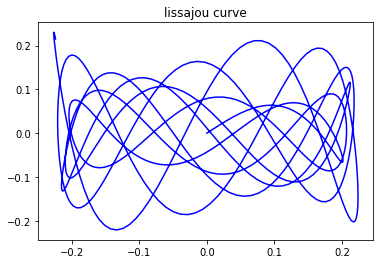

In [80]:
a = 5 # plotting the curves for different values of a/b
b = 16 

# Using the differntial equations approach, we do not need to use delta nor the old value of t.
#delta = np.pi/6   #as the denominator grows bigger, the curve becomes more elliptical
#t = np.linspace(-np.pi,np.pi,300)

def RK4(diffeq, y0, t, h):
    k1 = h*diffeq(y0, t)
    k2 = h*diffeq(y0 + 0.5*k1, t+h/2)
    k3 = h*diffeq(y0 + 0.5*k1, t+h/2)
    k4 = h*diffeq(y0 + 0.5*k1, t+h)
    return y0 + k1/6 + k2/3 + k3/3 + k4/6

def lissajous(y0, t):  #this is the function that the integrator calls
    dydt = np.zeros(4) #initialize array; each element is a derivative of y0=[x, y, vx, vy]
    dydt[0] = y0[2] # x velocity
    dydt[1] = y0[3] # y velocity
    dydt[2] = -a**2 * y0[0] # x Fnet/m
    dydt[3] = -b**2 * y0[1] # y Fnet/m
    return dydt  # returns the model


#initial conditions
#initial values for position
rx0 = 0
ry0 = 0
#initial values for velocity
vx0 = 1
vy0 = 1

y0 = [rx0, ry0, vx0, vy0] #initial y position, initial y velocity

t = 0.0    # initial time
h = 0.01   # time step interval
ta, xn, yn = [],[],[] #lists to store time, numerical y-position, analytic y-position


while t<6.0:
    ta.append(t)  #appends new time to end
    xn.append(y0[0]) #appends new x position to end
    yn.append(y0[1]) #appends new y position to end
    
    y1 = RK4(lissajous, y0, t, h) #update y[n] using the RK4 calculation with the lissajou function


    for i in range(len(y1)): #reset y0 to the new vector
        y0[i] = y1[i]

    t = t + h #update clock

plt.figure()
plt.title("lissajou curve")
plt.plot(xn,yn, 'b-')
plt.show()



    

This last section used differential equations to solve for the lissajou curves. As you can see, they came out slightly different than when using parametric equations.

**Bibliography:**

Wolfram Mathworld http://mathworld.wolfram.com/LissajousCurve.html

Aaron Titus http://localhost:8888/notebooks/PHY2200/Unit_01/01-03-vectorize-blinscoe/01-03-vectorize.ipynb